<a href="https://colab.research.google.com/github/MariiaSam/DS_homeWork/blob/main/Hw6_%D0%94%D0%BE%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%B1%D1%96%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

Напишіть функцію гіпотези лінійної регресії у векторному вигляді:

In [ ]:
def h(X, w):
    return np.dot(X, w)

Створіть функцію для обчислення функції втрат у векторному вигляді:

In [ ]:
def loss_function(X, y, w):
    return np.square(h(X, w) - y).sum() / (2 * X.size)

Реалізуйте один крок градієнтного спуску:

In [ ]:
def gradient_step(X, y, w, learning_rate):
    m = len(y)
    grad = (X.T @ (h(X, w) - y)) / m
    w -= learning_rate * grad
    return w

In [ ]:
def gradient(X, y, learning_rate, num_iter, eps):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))

    w = np.zeros(X.shape[1])  # Initialize weights

    loss = loss_function(X, y, w)
    loss_history = [loss]

    for _ in range(num_iter):
        w = gradient_step(X, y, w, learning_rate)

        loss = loss_function(X, y, w)
        if abs(loss - loss_history[-1]) < eps:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return w, loss_history


Знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;
- знайдіть ці ж параметри за допомогою аналітичного рішення;
- порівняйте отримані результати

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Housing.csv")

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
norm = df.copy()
columns = ['price', 'area', 'bedrooms', 'bathrooms']
for column in columns:
  norm[column] = (df[column] - df[column].mean()) / df[column].std()

In [ ]:
X = norm[['area', 'bedrooms', 'bathrooms']].values
y = norm['price'].values
learning_rate = 0.001
num_iter = 100000
eps = 1e-12
w, loss_history = gradient(X, y, learning_rate, num_iter, eps)
print(f'Gradient Descent: {w.round(4)}')

Gradient Descent: [0.     0.4395 0.1606 0.3723]


In [ ]:
ones = np.ones((X.shape[0], 1)) # створення стовпчика такого ж розміру, як Х (там будуть зберігатись вільні члени)
X = np.hstack((ones, X)) #об*єднання
w_analytical = np.linalg.inv(X.T @ X) @ X.T @ y

print(f'Analytical Solution: {w_analytical.round(4)}')

Analytical Solution: [-0.      0.4395  0.1605  0.3723]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

y_train_pred = lin_reg_model.predict(X_train)
y_test_pred = lin_reg_model.predict(X_test)

print(f"Intercept (вільний член): {lin_reg_model.intercept_:.4f}")
print(f"Coefficients (коефіцієнти): {lin_reg_model.coef_}")

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

Intercept (вільний член): -0.0163
Coefficients (коефіцієнти): [0.         0.40082084 0.14213176 0.38208794]
Training MAE: 0.4983, MSE: 0.4461, R²: 0.4938
Testing MAE: 0.6765, MSE: 0.7861, R²: 0.4559


In [ ]:
# Зворотне масштабування для y_test
mean_price = df['price'].mean()
std_price = df['price'].std()
y_test_original = y_test * std_price + mean_price

# Зворотне масштабування для y_pred
y_pred_original = y_pred_scaled * std_price + mean_price

# Обчислення метрик на оригінальних значеннях
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

In [ ]:
print(f"Test MAE (оригінальні дані): {mae:.4f}")
print(f"Test MSE (оригінальні дані): {mse:.4f}")
print(f"Test R² (оригінальні дані): {r2:.4f}")

Test MAE (оригінальні дані): 1265052.8675
Test MSE (оригінальні дані): 2749391279786.7227
Test R² (оригінальні дані): 0.4561


Варіант 2. Масштабування ознак

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Housing.csv")

In [ ]:
X = df[['area', 'bedrooms', 'bathrooms']].values
y = df['price'].values

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

y_pred_scaled = lin_reg_model.predict(X_test)


Виведемо метрики моделей для масштабованих даних

In [ ]:
mae = mean_absolute_error(y_test, y_pred_scaled)
mse = mean_squared_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

# Виведення метрик
print(f"Test MAE (масштабовані дані): {mae:.4f}")
print(f"Test MSE (масштабовані дані): {mse:.4f}")
print(f"Test R² (масштабовані дані): {r2:.4f}")

# Виведення коефіцієнтів моделі
coefficients = lin_reg_model.coef_
intercept = lin_reg_model.intercept_

# Виведення коефіцієнтів
print(f"Коефіцієнти: {coefficients.round(4)}")
print(f"Вільний член (інтерсепт): {intercept.round(4)}")

Test MAE (масштабовані дані): 0.6771
Test MSE (масштабовані дані): 0.7875
Test R² (масштабовані дані): 0.4559
Коефіцієнти: [0.4008 0.1421 0.3821]
Вільний член (інтерсепт): -0.0163


Виконаємо зворотнє масштабування.

In [ ]:
# Зворотнє масштабування
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Обчислення метрик на оригінальній шкалі
mae = mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_pred_original)
mse = mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_pred_original)
r2 = r2_score(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_pred_original)

print(f"Test MAE: {mae:.4f}, Test MSE: {mse:.4f}, Test R²: {r2:.4f}")

Test MAE: 1265275.6699, Test MSE: 2750040479309.0522, Test R²: 0.4559


In [ ]:
coefficients = lin_reg_model.coef_
intercept = lin_reg_model.intercept_

print(f"Коефіцієнти: {coefficients.round(4)}")
print(f"Вільний член (intersept): {intercept.round(4)}")

Коефіцієнти: [0.4008 0.1421 0.3821]
Вільний член (intersept): -0.0163


Висновок: коєфіцієнти моделі співпадають

In [ ]:
results = pd.DataFrame({
    'Справжні значення': scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(),
    'Прогнозовані значення': y_pred_original
})

print("\nСправжні та прогнозовані значення:")
results.head()


Справжні та прогнозовані значення:


,Справжні значення,Прогнозовані значення
0,4060000.0,6.383168e+06
1,6650000.0,6.230250e+06
2,3710000.0,3.597885e+06
3,6440000.0,4.289731e+06
4,2800000.0,3.930446e+06


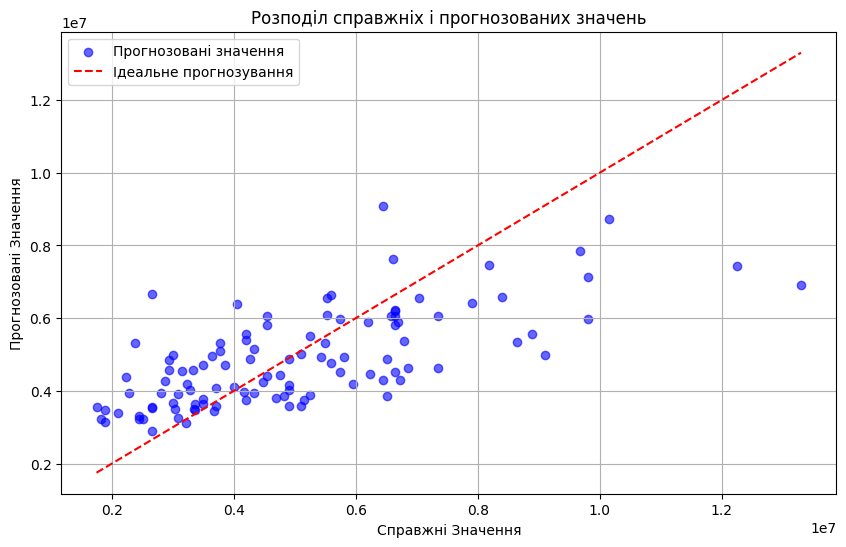

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, color='blue', label='Прогнозовані значення', alpha=0.6)

# Ідеальна лінія
x_line = np.linspace(y_test_original.min(), y_test_original.max(), 100)
plt.plot(x_line, x_line, color='red', linestyle='--', label='Ідеальне прогнозування')

plt.title('Розподіл справжніх і прогнозованих значень')
plt.xlabel('Справжні Значення')
plt.ylabel('Прогнозовані Значення')
plt.legend()
plt.grid()

plt.show()

Якщо ви не масштабували y, але масштабували незалежні змінні X, то немає потреби в зворотному масштабуванні, оскільки цільова змінна (наприклад, ціна) залишається в своїй початковій одиниці вимірювання. Втім, якщо ви масштабували y, то після отримання прогнозів потрібно провести зворотне масштабування, щоб перевести результати назад у початкові одиниці виміру.